In [1]:
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import verdict

In [4]:
import cc.atlas as atlas

In [5]:
a = atlas.Atlas( './atlas', bibtex_fp='../cc/tests/data/example_atlas/example.bib' )

#### Process the bibtex notes.

In [6]:
a.data.process_bibtex_annotations( word_per_concept=True )
a.data.identify_unique_key_concepts()

Dict, {
'VandeVoort2018a' : None,
'Stern2018' : None,
'Howk2017' : None,
'Garrison-kimmel2017' : None,
'Hopkins2017' : None,
'Hafen2016' : None,
'Muratov2016' : None,
'VandeVoort2016' : None,
'Hafen2019' : None,
'Hafen2019a' : None,
}

# Calculate inner products

#### Publications with self

In [7]:
ips = {}
for key, p in a.data.items():
    ips[key] = p.inner_product( p )
ips = verdict.Dict( ips )

#### Atlas with self

In [8]:
ip_atlas_self = a.inner_product( a )

#### Publications with atlas

In [9]:
ip = {}
for key, p in a.data.items():
    ip[key] = a.inner_product( p )
ip = verdict.Dict( ip )

#### Publications with a specific publication

In [10]:
cite_key = 'Hafen2019'

In [11]:
iph19 = {}
for key, p in a.data.items():
    iph19[key] = a.data[cite_key].inner_product( p )
iph19 = verdict.Dict( iph19 )

# Plot Results

In [12]:
cospsi = ip / ( ip_atlas_self * ips ).apply( np.sqrt )

In [13]:
cospsi_h19 = iph19 / ( ips[cite_key] * ips ).apply( np.sqrt )

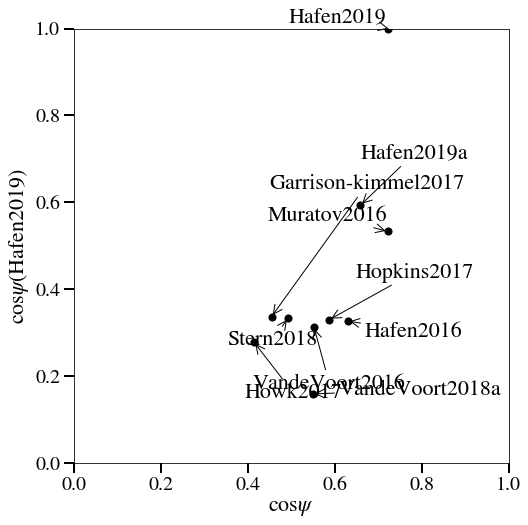

In [19]:
%matplotlib inline

fig = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

xs = cospsi.array()
ys = cospsi_h19.array()
ax.scatter(
    xs,
    ys,
    color = 'k',
    s = 50,
)
texts = []
for key, x in cospsi.items():
    texts.append(
        ax.annotate(
            xy = ( x, cospsi_h19[key] ),
            s = key,
            fontsize = 22,
            arrowprops = { 'arrowstyle': '->' }
        )
    )
adjust_text( texts )

ax.set_xlabel( r'$\cos \psi$', fontsize=22 )
ax.set_ylabel( r'$\cos \psi$(' + cite_key + ')', fontsize=22 )

ax.set_xlim( 0, 1 )
ax.set_ylim( 0, 1 )
ax.set_aspect( 'equal' )